In [50]:
# This model is about divorce prediction and the data was downloaded from UCI repository
# Importing the important library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import researchpy as rp
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report




In [38]:
# Let's define a function that helps us to read the data
def loaddata():
    file_path = r"C:\Users\ibrom\Desktop\AI_SATURDAY_ILORIN\divorce (2)\divorce.xlsx"
    read_path = pd.read_excel(file_path)
    return read_path


divorce = loaddata()
divorce.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


## Attribute information

1. If one of us apologizes when our discussion deteriorates, the discussion ends.
2. I know we can ignore our differences, even if things get hard sometimes.
3. When we need it, we can take our discussions with my spouse from the beginning and correct it.
4. When I discuss with my spouse, to contact him will eventually work.
5. The time I spent with my wife is special for us.
6. We don't have time at home as partners.
7. We are like two strangers who share the same environment at home rather than family.
8. I enjoy our holidays with my wife.
9. I enjoy traveling with my wife.
10. Most of our goals are common to my spouse.
11. I think that one day in the future, when I look back, I see that my spouse and I have been in harmony with each other.
12. My spouse and I have similar values in terms of personal freedom.
13. My spouse and I have similar sense of entertainment.
14. Most of our goals for people (children, friends, etc.) are the same.
15. Our dreams with my spouse are similar and harmonious.
16. We're compatible with my spouse about what love should be.
17. We share the same views about being happy in our life with my spouse
18. My spouse and I have similar ideas about how marriage should be
19. My spouse and I have similar ideas about how roles should be in marriage
20. My spouse and I have similar values in trust.
21. I know exactly what my wife likes.
22. I know how my spouse wants to be taken care of when she/he sick.
23. I know my spouse's favorite food.
24. I can tell you what kind of stress my spouse is facing in her/his life.
25. I have knowledge of my spouse's inner world.
26. I know my spouse's basic anxieties.
27. I know what my spouse's current sources of stress are.
28. I know my spouse's hopes and wishes.
29. I know my spouse very well.
30. I know my spouse's friends and their social relationships.
31. I feel aggressive when I argue with my spouse.
32. When discussing with my spouse, I usually use expressions such as ‘you always’ or ‘you never’ .
33. I can use negative statements about my spouse's personality during our discussions.
34. I can use offensive expressions during our discussions.
35. I can insult my spouse during our discussions.
36. I can be humiliating when we discussions.
37. My discussion with my spouse is not calm.
38. I hate my spouse's way of open a subject.
39. Our discussions often occur suddenly.
40. We're just starting a discussion before I know what's going on.
41. When I talk to my spouse about something, my calm suddenly breaks.
42. When I argue with my spouse, ı only go out and I don't say a word.
43. I mostly stay silent to calm the environment a little bit.
44. Sometimes I think it's good for me to leave home for a while.
45. I'd rather stay silent than discuss with my spouse.
46. Even if I'm right in the discussion, I stay silent to hurt my spouse.
47. When I discuss with my spouse, I stay silent because I am afraid of not being able to control my anger.
48. I feel right in our discussions.
49. I have nothing to do with what I've been accused of.
50. I'm not actually the one who's guilty about what I'm accused of.
51. I'm not the one who's wrong about problems at home.
52. I wouldn't hesitate to tell my spouse about her/his inadequacy.
53. When I discuss, I remind my spouse of her/his inadequacy.
54. I'm not afraid to tell my spouse about her/his incompetence.


In [2]:
#Getting the basic info about our data
divorce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 55 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Atr1    170 non-null    int64
 1   Atr2    170 non-null    int64
 2   Atr3    170 non-null    int64
 3   Atr4    170 non-null    int64
 4   Atr5    170 non-null    int64
 5   Atr6    170 non-null    int64
 6   Atr7    170 non-null    int64
 7   Atr8    170 non-null    int64
 8   Atr9    170 non-null    int64
 9   Atr10   170 non-null    int64
 10  Atr11   170 non-null    int64
 11  Atr12   170 non-null    int64
 12  Atr13   170 non-null    int64
 13  Atr14   170 non-null    int64
 14  Atr15   170 non-null    int64
 15  Atr16   170 non-null    int64
 16  Atr17   170 non-null    int64
 17  Atr18   170 non-null    int64
 18  Atr19   170 non-null    int64
 19  Atr20   170 non-null    int64
 20  Atr21   170 non-null    int64
 21  Atr22   170 non-null    int64
 22  Atr23   170 non-null    int64
 23  Atr24   170 non

In [3]:
# Let's check for missing values
divorce.isnull().sum()

Atr1     0
Atr2     0
Atr3     0
Atr4     0
Atr5     0
Atr6     0
Atr7     0
Atr8     0
Atr9     0
Atr10    0
Atr11    0
Atr12    0
Atr13    0
Atr14    0
Atr15    0
Atr16    0
Atr17    0
Atr18    0
Atr19    0
Atr20    0
Atr21    0
Atr22    0
Atr23    0
Atr24    0
Atr25    0
Atr26    0
Atr27    0
Atr28    0
Atr29    0
Atr30    0
Atr31    0
Atr32    0
Atr33    0
Atr34    0
Atr35    0
Atr36    0
Atr37    0
Atr38    0
Atr39    0
Atr40    0
Atr41    0
Atr42    0
Atr43    0
Atr44    0
Atr45    0
Atr46    0
Atr47    0
Atr48    0
Atr49    0
Atr50    0
Atr51    0
Atr52    0
Atr53    0
Atr54    0
Class    0
dtype: int64

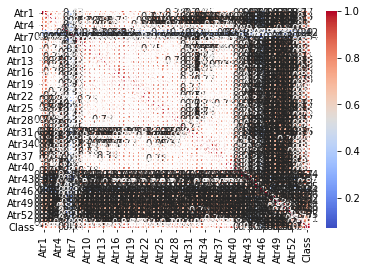

In [4]:
# Let's use heatmap to see how the attributes correlate with the target
sns.heatmap(divorce.corr(), cmap = 'coolwarm', annot = True)


Nothing much can be deduced from here

In [5]:
# Let's examine the correlation via correlation matrix
divorce.corr()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
Atr1,1.000000,0.819066,0.832508,0.825066,0.881272,0.287140,0.427989,0.802357,0.845916,0.790183,...,0.400296,0.582693,0.633564,0.674843,0.725443,0.684143,0.575463,0.611422,0.768522,0.861324
Atr2,0.819066,1.000000,0.805876,0.791313,0.819360,0.102843,0.417616,0.864284,0.827711,0.782286,...,0.389519,0.616884,0.643762,0.659841,0.680538,0.636558,0.536294,0.610726,0.728897,0.820774
Atr3,0.832508,0.805876,1.000000,0.806709,0.800774,0.263032,0.464071,0.757264,0.816653,0.753017,...,0.308149,0.544863,0.638256,0.647961,0.663995,0.600603,0.491803,0.598749,0.673012,0.806709
Atr4,0.825066,0.791313,0.806709,1.000000,0.818472,0.185963,0.474806,0.798347,0.829053,0.873636,...,0.340240,0.552301,0.630205,0.699069,0.685263,0.624015,0.534264,0.588390,0.698264,0.819583
Atr5,0.881272,0.819360,0.800774,0.818472,1.000000,0.297834,0.381378,0.877584,0.916327,0.823659,...,0.470758,0.719899,0.659220,0.762257,0.795960,0.742664,0.663855,0.719493,0.836799,0.893180
Atr6,0.287140,0.102843,0.263032,0.185963,0.297834,1.000000,0.424212,0.184019,0.301342,0.266076,...,0.127759,0.212979,0.200673,0.201091,0.221100,0.179119,0.205056,0.258092,0.292428,0.420913
Atr7,0.427989,0.417616,0.464071,0.474806,0.381378,0.424212,1.000000,0.412807,0.517522,0.498266,...,0.069850,0.254225,0.311110,0.291325,0.332370,0.349920,0.243104,0.313725,0.347493,0.544835
Atr8,0.802357,0.864284,0.757264,0.798347,0.877584,0.184019,0.412807,1.000000,0.915301,0.828031,...,0.433541,0.675584,0.588531,0.674776,0.729668,0.690190,0.658613,0.705071,0.807911,0.869569
Atr9,0.845916,0.827711,0.816653,0.829053,0.916327,0.301342,0.517522,0.915301,1.000000,0.852385,...,0.434318,0.693839,0.611726,0.711503,0.755509,0.713750,0.652376,0.699211,0.810977,0.912368
Atr10,0.790183,0.782286,0.753017,0.873636,0.823659,0.266076,0.498266,0.828031,0.852385,1.000000,...,0.342315,0.559998,0.550313,0.659604,0.672236,0.618666,0.513842,0.592641,0.698528,0.834897



Most of the features here are highly correlated with the class. Let's try univariate EDA to know the most important features. In this exercise, we compare whether there is statistically significant relationship beteen each feature and a target, then the feature that are related with highest confidence are selected

In [6]:
# Adapted from https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

from sklearn.feature_selection import SelectKBest, chi2
X = divorce.iloc[:,0:54]  #independent columns
y = divorce.iloc[:,54]    #target column 
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

    Specs       Score
35  Atr36  267.489029
39  Atr40  256.790322
34  Atr35  255.474336
18  Atr19  239.136230
8    Atr9  234.069948
4    Atr5  233.046336
17  Atr18  232.754290
19  Atr20  230.199773
16  Atr17  230.179481
10  Atr11  229.052242



First, let's create a new dataframe that holds this important features

In [7]:
divorce_ = divorce[['Atr5', 'Atr9', 'Atr11', 'Atr17', 'Atr18', 'Atr19', 'Atr20', 'Atr35','Atr36', 'Atr40', 'Class']]
divorce_

,Atr5,Atr9,Atr11,Atr17,Atr18,Atr19,Atr20,Atr35,Atr36,Atr40,Class
0,0,0,1,0,0,0,1,0,1,3,1
1,4,4,4,4,4,3,2,0,2,4,1
2,1,1,3,3,3,3,2,1,1,3,1
3,3,3,4,3,3,3,4,1,1,4,1
4,1,0,0,1,1,2,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,0
166,0,0,0,0,0,0,0,1,1,1,0
167,0,0,0,0,0,0,1,0,0,2,0
168,0,0,0,0,0,0,0,0,0,1,0


In [8]:
#Let's drop the target column for now and move forward with our analysis
divorce1 = divorce_.drop("Class", axis = 1)
divorce1

,Atr5,Atr9,Atr11,Atr17,Atr18,Atr19,Atr20,Atr35,Atr36,Atr40
0,0,0,1,0,0,0,1,0,1,3
1,4,4,4,4,4,3,2,0,2,4
2,1,1,3,3,3,3,2,1,1,3
3,3,3,4,3,3,3,4,1,1,4
4,1,0,0,1,1,2,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0
166,0,0,0,0,0,0,0,1,1,1
167,0,0,0,0,0,0,1,0,0,2
168,0,0,0,0,0,0,0,0,0,1


In [9]:
# transpose the dataframe so that we can get the sum of response corresponding to the scale
divorce_transposed = divorce1.transpose()
divorce_transposed

,0,1,2,3,4,5,6,7,8,9,...,160,161,162,163,164,165,166,167,168,169
Atr5,0,4,1,3,1,0,1,2,0,1,...,0,2,0,0,0,0,0,0,0,0
Atr9,0,4,1,3,0,0,2,3,3,2,...,0,1,0,0,0,0,0,0,0,0
Atr11,1,4,3,4,0,0,2,4,3,3,...,0,1,0,1,0,0,0,0,0,0
Atr17,0,4,3,3,1,2,3,2,3,1,...,1,2,0,1,0,0,0,0,0,0
Atr18,0,4,3,3,1,1,3,3,3,2,...,0,1,0,0,0,0,0,0,0,0
Atr19,0,3,3,3,2,0,3,2,3,1,...,0,0,0,0,0,0,0,0,0,0
Atr20,1,2,2,4,1,1,2,1,3,0,...,0,0,0,0,0,0,0,1,0,1
Atr35,0,0,1,1,0,1,1,2,1,0,...,1,0,0,0,0,0,1,0,0,0
Atr36,1,2,1,1,0,1,2,1,1,0,...,1,0,0,0,0,0,1,0,0,0
Atr40,3,4,3,4,1,2,3,4,2,2,...,1,0,0,0,0,0,1,2,1,0


In [10]:
# Now let's create five new columns corresponding for the scales
divorce_transposed['Never'] = (divorce_transposed.iloc[:] == 0).sum(axis = 1)
divorce_transposed['Seldom'] = (divorce_transposed.iloc[:] == 1).sum(axis = 1)
divorce_transposed['Averagely'] = (divorce_transposed.iloc[:] == 2).sum(axis = 1)
divorce_transposed['Frequently'] = (divorce_transposed.iloc[:] == 3).sum(axis = 1)
divorce_transposed['Always'] = (divorce_transposed.iloc[:] == 4).sum(axis = 1)
divorce_transposed

,0,1,2,3,4,5,6,7,8,9,...,165,166,167,168,169,Never,Seldom,Averagely,Frequently,Always
Atr5,0,4,1,3,1,0,1,2,0,1,...,0,0,0,0,0,82,10,8,44,26
Atr9,0,4,1,3,0,0,2,3,3,2,...,0,0,0,0,0,84,7,13,49,17
Atr11,1,4,3,4,0,0,2,4,3,3,...,0,0,0,0,0,71,19,4,44,33
Atr17,0,4,3,3,1,2,3,2,3,1,...,0,0,0,0,0,73,15,6,50,26
Atr18,0,4,3,3,1,1,3,3,3,2,...,0,0,0,0,0,79,10,16,44,21
Atr19,0,3,3,3,2,0,3,2,3,1,...,0,0,0,0,0,77,11,5,50,27
Atr20,1,2,2,4,1,1,2,1,3,0,...,0,0,1,0,1,81,10,21,36,22
Atr35,0,0,1,1,0,1,1,2,1,0,...,0,1,0,0,0,85,13,1,15,56
Atr36,1,2,1,1,0,1,2,1,1,0,...,0,1,0,0,0,88,9,2,24,47
Atr40,3,4,3,4,1,2,3,4,2,2,...,0,1,2,1,0,72,13,6,23,56


In [11]:
# We only need the resulting categories to move on with our analysis
resulting_scale = divorce_transposed.iloc[:, 170:175]
resulting_scale

,Never,Seldom,Averagely,Frequently,Always
Atr5,82,10,8,44,26
Atr9,84,7,13,49,17
Atr11,71,19,4,44,33
Atr17,73,15,6,50,26
Atr18,79,10,16,44,21
Atr19,77,11,5,50,27
Atr20,81,10,21,36,22
Atr35,85,13,1,15,56
Atr36,88,9,2,24,47
Atr40,72,13,6,23,56


Now, let's use stacked bar chart to analyze and visualize the ten attributes

In [12]:

resulting_scale.index.name = 'Feature'
resulting_scale = resulting_scale.reset_index()
resulting_scale

,Feature,Never,Seldom,Averagely,Frequently,Always
0,Atr5,82,10,8,44,26
1,Atr9,84,7,13,49,17
2,Atr11,71,19,4,44,33
3,Atr17,73,15,6,50,26
4,Atr18,79,10,16,44,21
5,Atr19,77,11,5,50,27
6,Atr20,81,10,21,36,22
7,Atr35,85,13,1,15,56
8,Atr36,88,9,2,24,47
9,Atr40,72,13,6,23,56


In [13]:
resulting_scale['Never'].mean(), resulting_scale['Averagely'].mean()

(79.2, 8.2)

In [15]:
# creating a list of the scale and a dictionary of the features 
feature_name = list(resulting_scale.columns.drop("Feature"))
results = resulting_scale.set_index('Feature').T.to_dict('list')
feature_name, results

(['Never', 'Seldom', 'Averagely', 'Frequently', 'Always'],
 {'Atr5': [82, 10, 8, 44, 26],
  'Atr9': [84, 7, 13, 49, 17],
  'Atr11': [71, 19, 4, 44, 33],
  'Atr17': [73, 15, 6, 50, 26],
  'Atr18': [79, 10, 16, 44, 21],
  'Atr19': [77, 11, 5, 50, 27],
  'Atr20': [81, 10, 21, 36, 22],
  'Atr35': [85, 13, 1, 15, 56],
  'Atr36': [88, 9, 2, 24, 47],
  'Atr40': [72, 13, 6, 23, 56]})

NameError: name 'category_names' is not defined

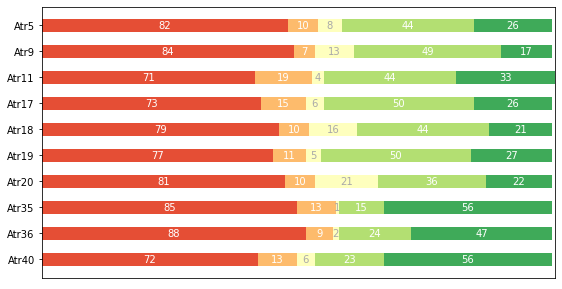

In [19]:
'''
------------
The following code was adapted from https://matplotlib.org/3.1.3/gallery/lines_bars_and_markers/horizontal_barchart_distribution.html#sphx-glr-gallery-lines-bars-and-markers-horizontal-barchart-distribution-py
'''
def plotCat(results, feature_name):
   
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(feature_name, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


plotCat(results, feature_name)
plt.show()
plt.savefig('divorce.png')

This gives a visual representation of our important features

### Bivariate analysis
Let's carry out some bivariate statistics and probably try to make some inferences

##### Inference Number 1
H null: Couples who know their spouse very well wouldn't hesitate to tell them about their inadequacies
H alternative: Couples who know their spouse very well would hesitate to tell them about their inadequacies. In other words, we are trying to investigate if relationship exists between attribute 52 and 29. For this reason, we use spearman rank correlation but we need to check if it's assumptions are satisfied first.

In [20]:
# first let us unofficially check the pattern of rensponse to the two variables in question by using multiple bar chart
# # Extracting the count corresponding to each scale
Atr29 = rp.summary_cat(divorce['Atr29'])
Atr52 = rp.summary_cat(divorce['Atr52'])


Text(0, 0.5, 'Frequency of the scale')

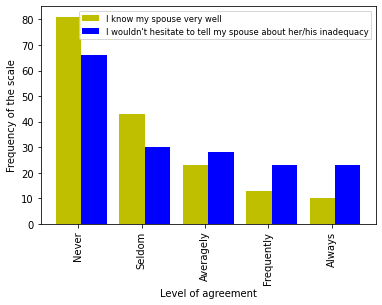

In [21]:
# Plotting multiple bar chart
index = np.arange(5)
plt.bar(index + 0.1, Atr29['Count'], color = 'y', width = 0.4, label = 'I know my spouse very well')
plt.bar(index + 0.5, Atr52['Count'], color = 'b', width = 0.4, label = "I wouldn't hesitate to tell my spouse about her/his inadequacy")
plt.xticks(index + 0.25, feature_name, rotation = 'vertical')
plt.legend(loc = 0, fontsize = 'small')
plt.xlabel("Level of agreement")
plt.ylabel("Frequency of the scale")


Lokking at the pattern of response to the two questions, we can unofficially conclude that Those that know their spouses very well would not hesitate to tell them about their inadequacy. However, this needs to be proven officially using statistical tests.

(<matplotlib.collections.PathCollection at 0x1b9d1d963c8>,
 Text(0.5, 1.0, 'Atr29 vs Atr52'))

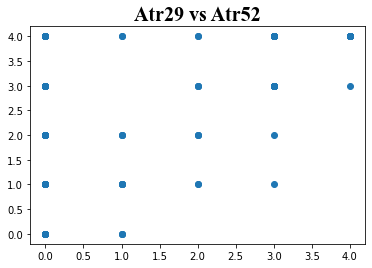

In [22]:
# Now Let's do our official check
# First we do our assumption check about the proposed test i.e spearman rank correlation
# Checking if the two variables are nonlinearly related
def LinearityAssumption(df,x,y):
    plot = plt.scatter(divorce[x], divorce[y])
    return plot, plt.title(x + ' ' + 'vs' + ' ' + y, fontname = "Times New Roman", fontsize = 20)

    
LinearityAssumption(divorce, 'Atr29', 'Atr52')

Assumption satisfied

Text(0.5, 1.0, 'Atr 29 and 52 p-p plot')

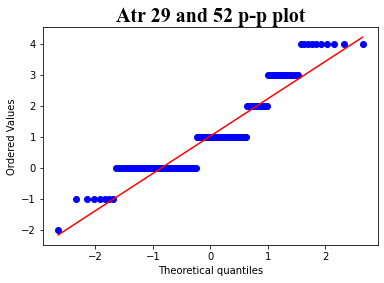

In [23]:
# Checking the normality using p-p plot
from scipy import stats #Importing stats from scipy
# Now, Let's define a function that does the Normality check
def NormalityCheck(df, x, y):
    diff = df[x] - df[y] #getting the difference between the two columns
    plot = stats.probplot(diff, plot = plt)
    return plot

NormalityCheck(divorce,'Atr52', 'Atr29' )
plt.title("Atr 29 and 52 p-p plot", fontname = "Times New Roman", fontsize = 20)

Assumption satisfied

In [24]:
spearmanr_coeffcient, p_value = stats.spearmanr(divorce['Atr52'],divorce['Atr29'])
print("Spearman Rank Correlation coefficient is {:.3f} and the p value is {:.3f}".format(spearmanr_coeffcient, p_value))

Spearman Rank Correlation coefficient is 0.660 and the p value is 0.000


With P value less than 0.05, we reject the null hypothesis and conclude that couples who know their spouses very well would tell them about their inadequacies

###### Inference Number 2
Couples whose their discussions with their spouses is not calm do not have the tendency to use offensive expressions during discussions. In other words, there is not a relationship between attribute 34 and 37. Again, we'll use spearman rank because we are dealing with categorical ordinal data. But before we proceed, let's check if the assumption of non-linearity and normality are satisfied.

First let's carry out an unofficial check like we did above

Text(0, 0.5, 'Frequency of the scale')

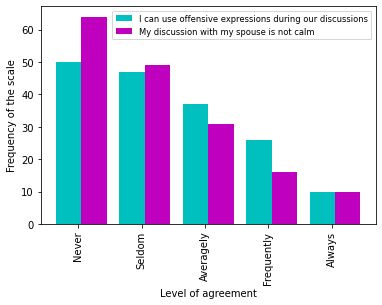

In [25]:
# Extracting the count corresponding to each scale
Atr34 = rp.summary_cat(divorce['Atr34']) 
Atr37 = rp.summary_cat(divorce['Atr37'])

index = np.arange(5)
plt.bar(index + 0.1, Atr34['Count'], color = 'c', width = 0.4, label = 'I can use offensive expressions during our discussions')
plt.bar(index + 0.5, Atr37['Count'], color = 'm', width = 0.4, label = "My discussion with my spouse is not calm")
plt.xticks(index + 0.25, feature_name, rotation = 'vertical')
plt.legend(loc = 0, fontsize = 'small')
plt.xlabel("Level of agreement")
plt.ylabel("Frequency of the scale")

Again, we can unofficially conclude that couples who are not calm with their spouses during discussions are very much likely to use offensive expressions. However, we need to prove this officially using statistical tests - spearman rank will also be used because our variables are categorical and ordinal. Also the distribution is not norma

(<matplotlib.collections.PathCollection at 0x1b9d47fd608>,
 Text(0.5, 1.0, 'Atr34 vs Atr37'))

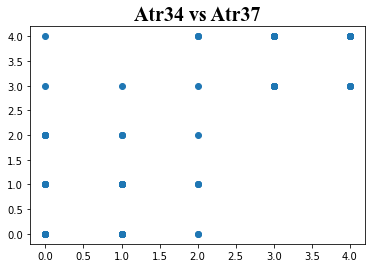

In [26]:
# Checking if the two variables are nonlinearly related
LinearityAssumption(divorce, 'Atr34', 'Atr37')

This is not a linear distribution, therefore the assuption of non linearity is satisfied

Text(0.5, 1.0, 'Atr 34 and 37 p-p plot')

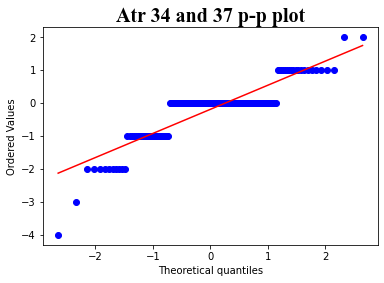

In [27]:
NormalityCheck(divorce,'Atr34', 'Atr37' )
plt.title("Atr 34 and 37 p-p plot", fontname = "Times New Roman", fontsize = 20)

The assumptions satisfied

In [28]:
spearmanr_coeffcient, p_value = stats.spearmanr(divorce['Atr34'],divorce['Atr37'])
print("Spearman Rank Correlation coefficient is {:.3f} and the p value is {:.3f}".format(spearmanr_coeffcient, p_value))

Spearman Rank Correlation coefficient is 0.842 and the p value is 0.000



With P value less than 0.05 an we reject the null hypothesis and conclude that couples who are not calm while discussing with their sposes have the endency to use offensive expressions

# Now let's start training our model

In [32]:
#Define feature and label
X = divorce_.drop('Class', axis = 1)
Y = divorce_.Class

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 9000, test_size = .2)
print(X.shape, Y.shape)

(170, 10) (170,)


In [33]:
lr = LogisticRegression()
#lr.fit(X_train, Y_train)

In [ ]:
#print("Accuracy score for train set is {:.3f}" .format(accuracy_score(Y_train, lr.predict(X_train))))
#print("Accuracy score for test set is {:.3f}" .format(accuracy_score(Y_test, lr.predict(X_test))))

In [34]:
params = {'max_iter': np.array([100,50,150]), 'C' : np.linspace(0.1,0.8,5)}
clf = GridSearchCV(lr, params, cv = 3)
clf.fit(X_train,Y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.1  , 0.275, 0.45 , 0.625, 0.8  ]),
                         'max_iter': array([100,  50, 150])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [35]:
clf.best_score_, clf.best_params_

(0.977938808373591, {'C': 0.1, 'max_iter': 100})

In [40]:
c_matrix = confusion_matrix(Y_test, clf.predict(X_test))
c_matrix

array([[20,  0],
       [ 1, 13]], dtype=int64)

20 and 13 represent the actual prediction while 0 and 1 are incorrect predictions

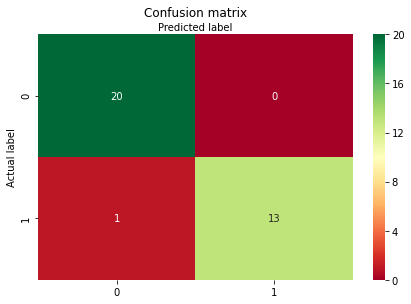

In [41]:
class_names = [0,1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
#creating a heatmap
sns.heatmap(pd.DataFrame(c_matrix), annot = True, cmap = 'RdYlGn', fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix", y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

Let's compare he performance of Logistic Regrsession using all our features

In [44]:
#model evaluation
report = classification_report(Y_test, clf.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      0.93      0.96        14

    accuracy                           0.97        34
   macro avg       0.98      0.96      0.97        34
weighted avg       0.97      0.97      0.97        34



We want to try another algorithm

In [51]:
gb = GradientBoostingClassifier()

In [52]:
params = {'max_depth': np.array([1,2,3,4]), 'learning_rate' : np.linspace(0.1,0.01,10)}
clf = GridSearchCV(gb, params, cv = 3)
clf.fit(X_train,Y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...=None,
           

In [53]:
clf.best_score_, clf.best_params_

(0.977938808373591, {'learning_rate': 0.1, 'max_depth': 1})

In [54]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train, Y_train)

C:\Users\ibrom\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [55]:
print("Accuracy score for train set is {:.3f}" .format(accuracy_score(Y_train, mlp.predict(X_train))))
print("Accuracy score for test set is {:.3f}" .format(accuracy_score(Y_test, mlp.predict(X_test))))

Accuracy score for train set is 1.000
Accuracy score for test set is 0.971


Our accuracy score hovers around 97% for the algorithms used 